* 장점
    * 구헌이 비교적 간단하다.
    * 클러스트링 결과를 쉽게 해석할 수 있다.
* 단점
    * 최적의 k값을 자동으로 찾지 못하고, 사용자가 직접 선택해야 한다. 거리 기반 알고리즘이기 때문에, 변수의 스케일에 따라 다른 결괄르 나타낼 수 있다.

* 유용한 곳
    * 종속변수가 없는 데이터셋에서 데이터 특성을 비교적 간단하게 살펴보는 용도로 활용할 수 있다.
    * 마케팅이나 제품 기획 등을 목적으로 한 고객 분류에 사용할 수 있다.
    * 지도 학습에서 종속변수를 제외하고 사용하면, 탐색적 자료 분석 혹은 피처 엔지니어링 용도로 사용할 수 있다.

## 12.1 문제 정의: 한눈에 보는 예측 목표

* 미션 : 데이터들을 비슷한 속성끼리 분류하라.
* 알고리즘 : K-평균 군집화(K-means clustering)
* 문제 유형 : 비지도 학습
* 평가 지표 : 엘보우 기법, 실루엣 점수

## 12.2 k-평균 군집화 맛보기 : 인위적으로 만든 데이터셋

### 12.2.1 라이브러리 및 연습용 데이터 불러오기, 데이터 확인하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/example_cluster.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var_1   1000 non-null   float64
 1   var_2   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


<AxesSubplot:xlabel='var_1', ylabel='var_2'>

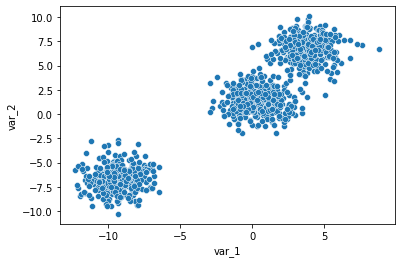

In [4]:
sns.scatterplot(x='var_1', y='var_2', data=data)

### 12.2.2 연습용 데이터 모델링 및 평가

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans_model = KMeans(n_clusters=3, random_state=100)

In [7]:
kmeans_model.fit(data)

KMeans(n_clusters=3, random_state=100)

In [8]:
kmeans_model.predict(data)

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [9]:
data['label'] = kmeans_model.predict(data)

<AxesSubplot:xlabel='var_1', ylabel='var_2'>

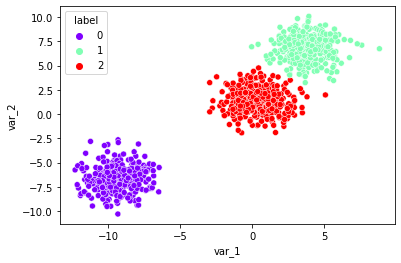

In [10]:
sns.scatterplot(x='var_1', y='var_2', data=data, hue='label', palette='rainbow')

### 12.2.3 엘보우 기법으로 최적의 k값 구하기

In [11]:
kmeans_model.inertia_

3090.033237076662

* 엘보우 기법 : 최적의 클러스터 개수를 확인하는 방법으로, 클러스터 중점과 각 데이터간의 거리를 기반으로 계산한다.
* 이너셔 : 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간의 거리에 대한 합

In [12]:
temp_model = KMeans(n_clusters=500, random_state=100)
temp_model.fit(data)
temp_model.inertia_

6.223542106584211

In [13]:
distance = []
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(data)
    distance.append(k_model.inertia_)

In [14]:
distance

[9908.551424778394,
 3090.033237076662,
 2718.150197090931,
 2379.2077724116825,
 2049.6263156279665,
 1825.777369727444,
 1591.1319380124628,
 1371.8822953610763]

<AxesSubplot:>

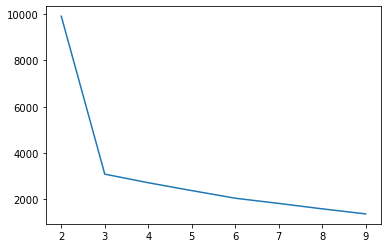

In [15]:
sns.lineplot(x=range(2, 10), y=distance)

## 12.3 데이터 불러오기 및 데이터 확인하기 : 고객 데이터셋

In [16]:
file_url = file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer.csv'
customer = pd.read_csv(file_url)

In [17]:
customer.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [18]:
customer['cc_num'].nunique()

100

In [19]:
customer['category'].nunique()

11

## 12.4 전처리: 피처 엔지니어링

In [20]:
customer_dummy = pd.get_dummies(customer, columns=['category'])

In [21]:
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


In [22]:
cat_list = customer_dummy.columns[2:]

In [23]:
cat_list

Index(['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery', 'category_health_fitness',
       'category_home', 'category_kids_pets', 'category_misc',
       'category_personal_care', 'category_shopping', 'category_travel'],
      dtype='object')

In [24]:
for i in cat_list:
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']

In [25]:
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [26]:
customer_agg = customer_dummy.groupby('cc_num').sum()

In [27]:
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [28]:
# K-평균 군집화는 거리 기반 알고리즘이기 때문에 데이터의 스케일에 영향을 많이 받는다. 여기서는 StandardScaler를 사용.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg), columns=customer_agg.columns, index=customer_agg.index)


In [29]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


## 12.5 고객 데이터 모델링 및 실루엣 계수

<AxesSubplot:>

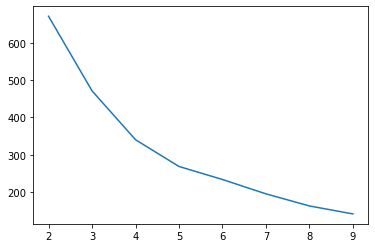

In [30]:
distance = []
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    distance.append(k_model.inertia_)

sns.lineplot(x=range(2, 10), y=distance)

* 이렇게 곡선이 비교적 완만하게 떨어질때 엘보우 기법을 적용하기 애매하다. k값을 결정하기 상당히 어려움. 이 대안으로 실우엣 계수를 확인해 볼 수 있다.

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette = []
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels))

<AxesSubplot:>

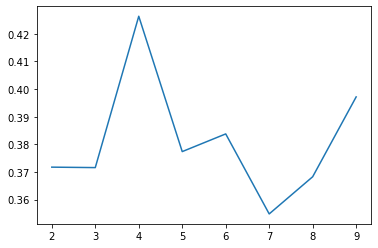

In [33]:
sns.lineplot(x=range(2, 10), y=silhouette)

## 12.6 최종 예측 모델 및 결과 해석

In [34]:
k_model = KMeans(n_clusters=4)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [35]:
scaled_df['label'] = labels

In [36]:
scaled_df_mean = scaled_df.groupby('label').mean()

In [37]:
scaled_df_count = scaled_df.groupby('label').count()['category_travel']

In [38]:
scaled_df_count = scaled_df_count.rename('count')

In [40]:
scaled_df_count

label
0    37
1    45
2     8
3    10
Name: count, dtype: int64

In [41]:
scaled_df_mean

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410
1,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740


In [42]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [43]:
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
1,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
